## Exercise 2.1: Regression

Here we will follow the example given in the lecture for regression with polynomial basis functions.

Say we have a dataset with real measurements of two variables $x$ and $y$. We want to model the relationship between the variables.

To make the exercise pedagogical, the actual relationship is given to you: $y = \sin(x) + 10$. Experiments are substituted by a function that generates random points with some Gaussian smearing in the $y$ direction to simulate experimental uncertainty.

The data from the first experiment is in the file `regression_data.csv`.

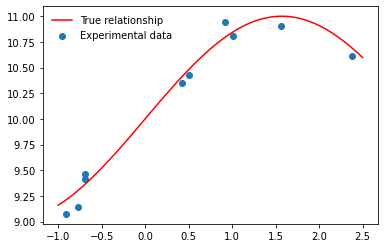

In [2]:
from scipy.stats import uniform as generator
from scipy.stats import norm as err
import pandas as pd
import numpy as np

def f(x):
    return 10 + np.sin(x)

def generate_data(N):
    x = generator.rvs(size=N)*3.5 - 1
    y = f(x) + err.rvs(scale = 0.1, size=N)
    return pd.DataFrame(data = {"x":x, "y":y})

df = pd.read_csv("regression_data.csv")

from matplotlib import pyplot as plt
plt.scatter(df["x"], df["y"], label = "Experimental data")
x_values = np.linspace(-1, 2.5, 100)
plt.plot(x_values, f(x_values), "r", label = "True relationship")
plt.legend(loc='best', frameon=False)
plt.show()

1) Perform curve fits to the data with polynomial functions of degree 1 to 8 and plot the predicted curve against the data points.

A polynomial of degree $n$ with coefficients $\vec{c} = (c_0, ... c_n)$ is simply
$$
f_n(x|\vec{c}) = \sum_{i=0}^n c_i x^i
$$

*Hint:* you can use [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html) and [polyval](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyval.html) from NumPy.

/usr/lib/python3/dist-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/usr/lib/python3/dist-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/usr/lib/python3/dist-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
/usr/lib/python3/dist-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


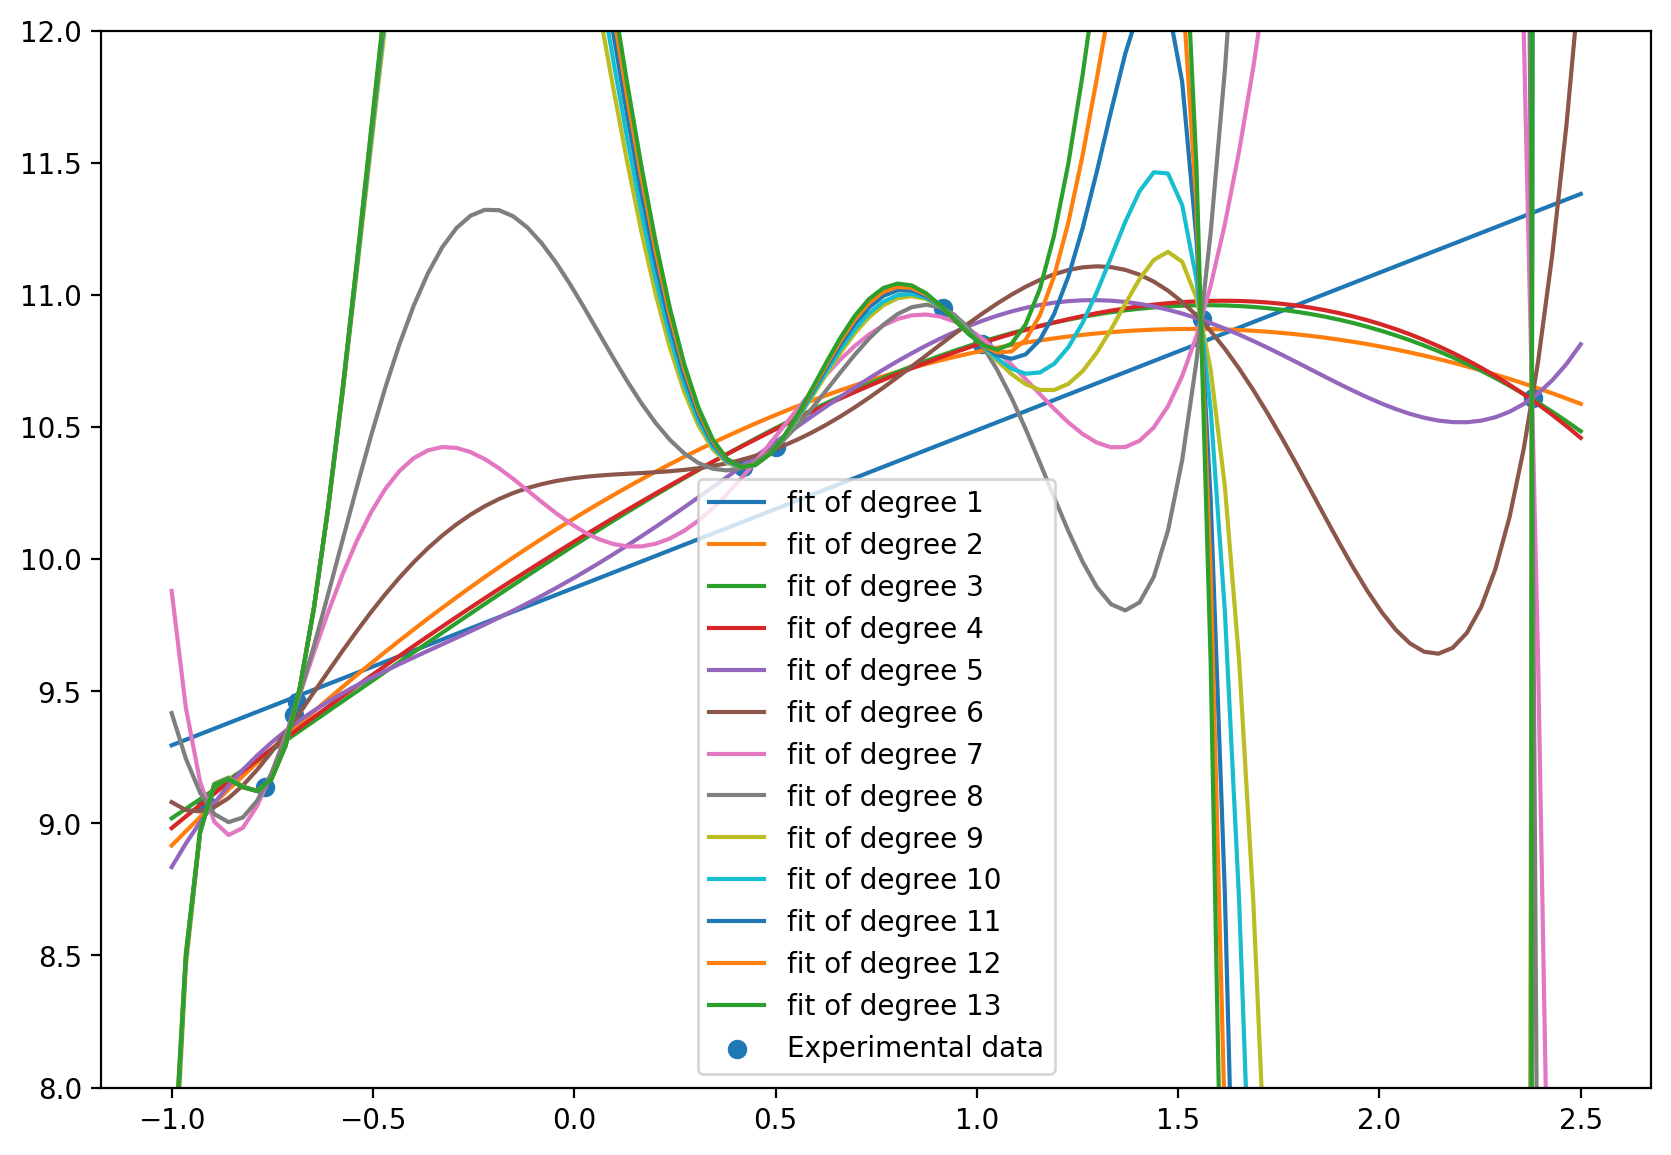

In [38]:
import numpy as np

polynoms = []

plt.figure(figsize=(10,7),dpi=200)

for n in range(1,14):
    pol = np.polynomial.polynomial.polyfit(df["x"],df["y"],n)
    plt.plot(x_values, np.polynomial.polynomial.polyval(x_values, pol), label = f"fit of degree {n}")
    polynoms.append(pol)


plt.ylim((8,12))
plt.scatter(df["x"], df["y"], label = "Experimental data")
plt.legend()
plt.show()

Now we want to evaluate the relationship that we have 'learned' from the first dataset by evaluating the $\chi^2$ of the models over many repeated experiments, where $$\chi^2 \equiv \frac{(y_\text{obs} - y_\text{exp})^2}{y_\text{exp}}$$

2) a) For each of the fitted functions from the previous part, evaluate the $\chi^2$ on many (e.g. 100) new samples of equal size to the first.

You can use the `generate_data(N)` function defined in the first code cell.

Counter-intuitively, it's best to use the $y$ from the generated data as the "expected" value, and the predicted $y$ from the model as the "observed" value.

b) Plot the average test $\chi^2$ as a function of degree of the polynomial.

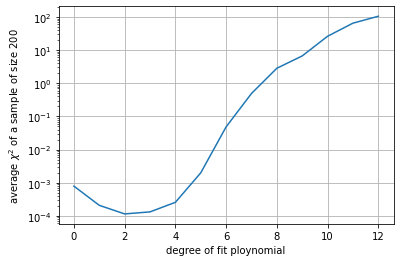

In [47]:
sampleSize = 200
averageChi2 = []

for i,pol in enumerate(polynoms):
    chi2 = []

    for k in range(sampleSize):
        testdata = generate_data(10)
        chi2.append(np.divide(np.square(np.subtract(np.polynomial.polynomial.polyval(testdata["x"],pol) , testdata["y"])), np.square(testdata["y"])))

    averageChi2.append(np.average(chi2))

plt.plot(averageChi2)
plt.xlabel("degree of fit ploynomial")
plt.ylabel(rf"average $\chi^2$ of a sample of size {sampleSize}")
plt.grid()
plt.yscale("log")
plt.show()

In [44]:
print(averageChi2)

[0.007846409487555515, 0.0020891907301238354, 0.0011825220534248016, 0.0012560844143052648, 0.002616627097039319, 0.02168570369115948, 0.5723418431801065, 4.427789045909318, 31.062410865442104, 78.97752519399825, 298.54268521130155, 609.0038703578804, 1560.0023449094226]
